In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from matplotlib import pyplot as plt
from numpy import mean
import os
from PIL import Image

In [ ]:
test_data =pd.read_csv('../input/mnist-test/verification_test.csv')
train_data = pd.read_csv('../input/mnist-test/verification_train.csv')

In [ ]:
test_label=test_data['label']

train_label=train_data['label']
data_names=[test_label,train_label]
all_labels=pd.concat(data_names,ignore_index=True)

data_name=[test_data,train_data]
all_image=pd.concat(data_name,ignore_index=True)
all_image=all_image.drop(labels='label',axis=1)

all_image=all_image/255.0
all_image=all_image.values.reshape(-1,28,28,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_image, all_labels, test_size=0.2)
train_dataset = list(zip(X_train,y_train))
test_dataset = list(zip(X_test,y_test))

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200
output_dim = 10
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 


In [ ]:
#import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
         
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_6 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 
# INSTANTIATE MODEL CLASS
 

In [12]:
iteration=[]
lossList=[]
accuracyList=[]
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)
 
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
Iteration_loss =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            iteration.append(iter)
            lossList.append(loss.item())
            accuracyList.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.306630849838257. Accuracy: 9.835714285714285
Iteration: 1000. Loss: 2.3028886318206787. Accuracy: 9.92142857142857
Iteration: 1500. Loss: 2.298295497894287. Accuracy: 18.1
Iteration: 2000. Loss: 2.2860372066497803. Accuracy: 29.457142857142856
Iteration: 2500. Loss: 2.1408133506774902. Accuracy: 22.492857142857144
Iteration: 3000. Loss: 1.6436216831207275. Accuracy: 31.75
Iteration: 3500. Loss: 1.0157371759414673. Accuracy: 47.08571428571429
Iteration: 4000. Loss: 0.6404722929000854. Accuracy: 54.35
Iteration: 4500. Loss: 0.8955121040344238. Accuracy: 58.792857142857144
Iteration: 5000. Loss: 1.1261627674102783. Accuracy: 59.65714285714286
Iteration: 5500. Loss: 0.5461226105690002. Accuracy: 64.70714285714286
Iteration: 6000. Loss: 1.0170880556106567. Accuracy: 63.50714285714286
Iteration: 6500. Loss: 0.5753145813941956. Accuracy: 69.49285714285715
Iteration: 7000. Loss: 0.9055112600326538. Accuracy: 74.93571428571428
Iteration: 7500. Loss: 0.7543835639953613. A

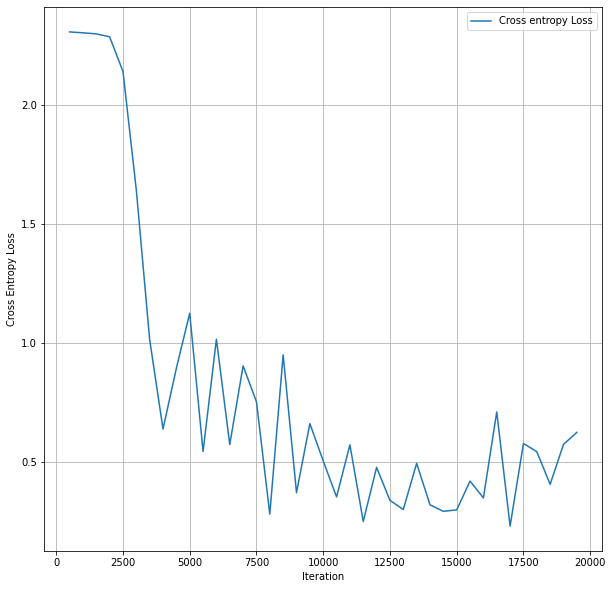

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(iteration, lossList, label='Cross entropy Loss')
# plt.plot(iteration, accuracyList, label='Accuracy')
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration')
plt.legend()
plt.grid()
plt.show()

In [ ]:
save_model = True
model_save_name = './experiment2.3.pt'
path = "./assignment2{model_save_name}" 

if save_model is True:
    # Saves only parameters
    # wights & biases
    #torch.save(model.state_dict(), root_path + 'linear_regression.pkl') 
    torch.save(model.state_dict(), path)